#**import essential libraries**


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as shc 
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

#**Importing dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ml

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ml


In [ ]:
df = pd.read_csv('supermarket.csv')

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#**Data Preprocessing**


**converting catogorical data to numerical data**

In [ ]:
df['Branch'].replace(['A', 'B', 'C'],[0,1,2],inplace=True)
df['Gender'].replace(['Female', 'Male'],[0, 1], inplace=True)
df['City'].replace(['Yangon', 'Naypyitaw', 'Mandalay'],[0, 1, 2], inplace=True)
df['Customer type'].replace(['Member', 'Normal'],[0, 1], inplace=True)
df['Payment'].replace(['Ewallet', 'Cash', 'Credit card'],[0, 1, 2], inplace=True)
df['Product line'].replace(['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories'],[0, 1, 2, 3, 4, 5], inplace=True)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,0,0,0,0,0,74.69,7,26.1415,548.9715,0,522.83,26.1415,9.1
1,2,1,1,0,1,15.28,5,3.8200,80.2200,1,76.40,3.8200,9.6
2,0,0,1,1,2,46.33,7,16.2155,340.5255,2,324.31,16.2155,7.4
3,0,0,0,1,0,58.22,8,23.2880,489.0480,0,465.76,23.2880,8.4
4,0,0,1,1,3,86.31,7,30.2085,634.3785,0,604.17,30.2085,5.3


**drop empty and nan data**

In [ ]:
df.dropna()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,0,0,0,0,74.69,7,26.1415,548.9715,1/5/2019,13:08,0,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,1,1,0,1,15.28,5,3.8200,80.2200,3/8/2019,10:29,1,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,0,1,1,2,46.33,7,16.2155,340.5255,3/3/2019,13:23,2,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,0,0,1,0,58.22,8,23.2880,489.0480,1/27/2019,20:33,0,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,0,1,1,3,86.31,7,30.2085,634.3785,2/8/2019,10:37,0,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,1,1,1,0,40.35,1,2.0175,42.3675,1/29/2019,13:46,0,40.35,4.761905,2.0175,6.2
996,303-96-2227,1,2,1,0,2,97.38,10,48.6900,1022.4900,3/2/2019,17:16,0,973.80,4.761905,48.6900,4.4
997,727-02-1313,0,0,0,1,4,31.84,1,1.5920,33.4320,2/9/2019,13:22,1,31.84,4.761905,1.5920,7.7
998,347-56-2442,0,0,1,1,2,65.82,1,3.2910,69.1110,2/22/2019,15:33,1,65.82,4.761905,3.2910,4.1


**Droping unwanted column**

In [ ]:
df.drop(['gross margin percentage'], axis=1, inplace=True)
df.drop("Time", axis=1, inplace=True)
df.drop("Date", axis=1, inplace=True)
df.drop(['Invoice ID'], axis=1, inplace=True)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,0,0,0,0,0,74.69,7,26.1415,548.9715,0,522.83,26.1415,9.1
1,2,1,1,0,1,15.28,5,3.8200,80.2200,1,76.40,3.8200,9.6
2,0,0,1,1,2,46.33,7,16.2155,340.5255,2,324.31,16.2155,7.4
3,0,0,0,1,0,58.22,8,23.2880,489.0480,0,465.76,23.2880,8.4
4,0,0,1,1,3,86.31,7,30.2085,634.3785,0,604.17,30.2085,5.3


#**Normalise the dataset**

**Use standart scaler to normalise the dataset**

In [ ]:
X_copy = df.copy() 
scaler = StandardScaler()
X_columns = df.columns
normalised = pd.DataFrame(scaler.fit_transform(X_copy), columns=X_columns)
normalised.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,-1.208970,-1.210174,-0.998002,-0.998002,-1.508252,0.718160,0.509930,0.919607,0.919607,-1.193736,0.919607,0.919607,1.238443
1,1.238338,0.009759,1.002002,-0.998002,-0.922295,-1.525303,-0.174540,-0.987730,-0.987730,0.042016,-0.987730,-0.987730,1.529527
2,-1.208970,-1.210174,1.002002,1.002002,-0.336339,-0.352781,0.509930,0.071446,0.071446,1.277767,0.071446,0.071446,0.248760
3,-1.208970,-1.210174,-0.998002,1.002002,-1.508252,0.096214,0.852165,0.675780,0.675780,-1.193736,0.675780,0.675780,0.830927
4,-1.208970,-1.210174,1.002002,1.002002,0.249617,1.156959,0.509930,1.267125,1.267125,-1.193736,1.267125,1.267125,-0.973790


#**Hierarchical Clustering**

In [ ]:
x = df.iloc[:, [6, 11]].values  
x

array([[ 7.    , 26.1415],
       [ 5.    ,  3.82  ],
       [ 7.    , 16.2155],
       ...,
       [ 1.    ,  1.592 ],
       [ 1.    ,  3.291 ],
       [ 7.    , 30.919 ]])

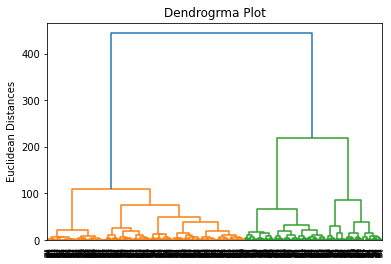

In [ ]:

dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogrma Plot")  
mtp.ylabel("Euclidean Distances")  

mtp.show()  

#**training the hierarchical model on dataset**

In [ ]:
from sklearn.cluster import AgglomerativeClustering  

In [ ]:
#visulaizing the clusters 
def clusters(col1, col2):
  x = df.iloc[:, [col1, col2]].values  
  hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
  y_pred= hc.fit_predict(x)  
  #y_pred
  mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
  mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
  mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
  mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
  mtp.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
  mtp.title('clusters of '+df.columns[col1]+' and '+df.columns[col2])  
  mtp.xlabel(df.columns[col1])  
  mtp.ylabel(df.columns[col2])  
  mtp.legend()  
  mtp.show()  

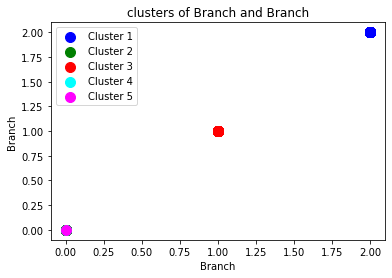

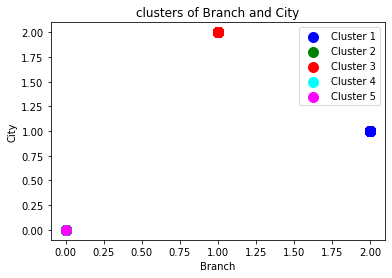

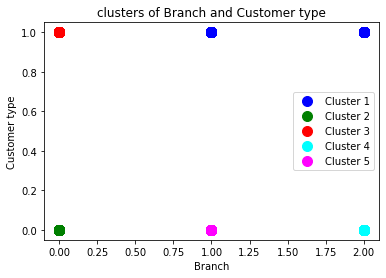

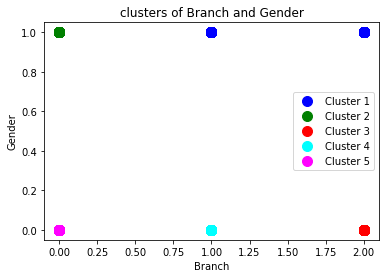

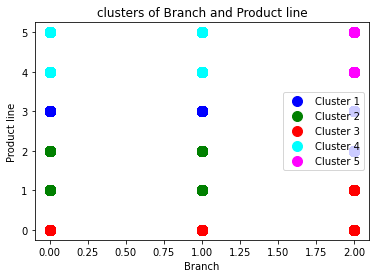

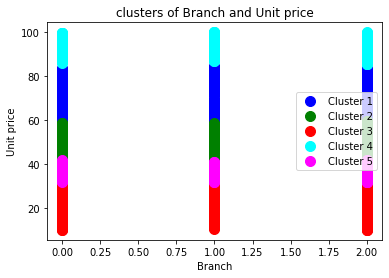

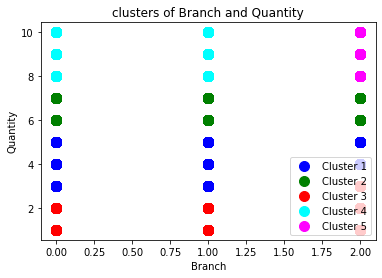

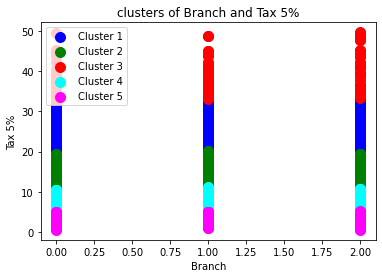

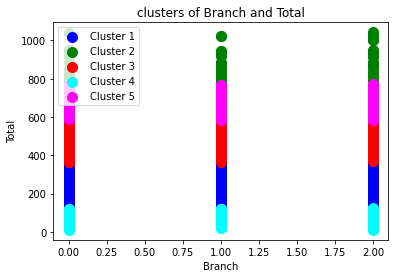

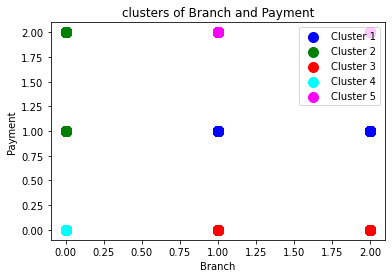

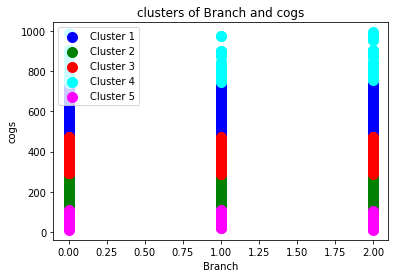

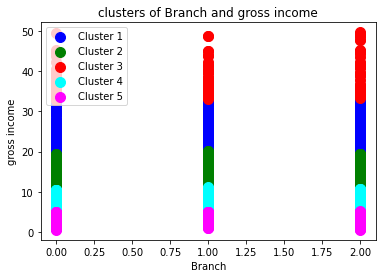

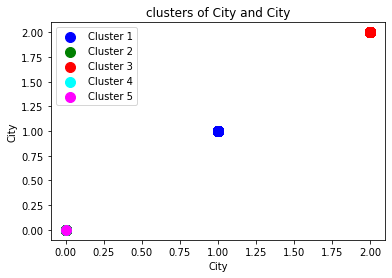

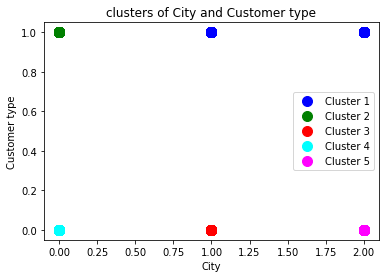

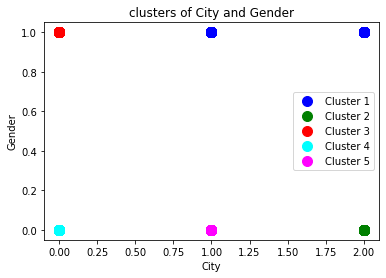

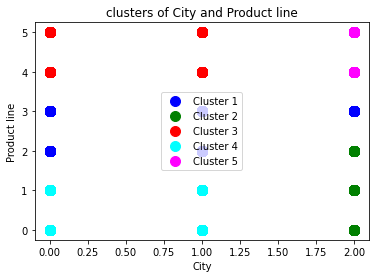

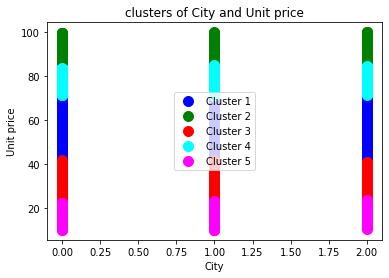

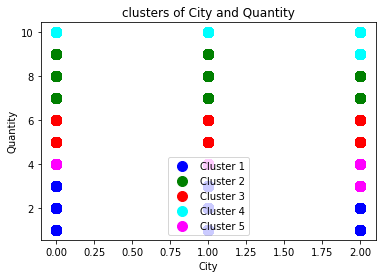

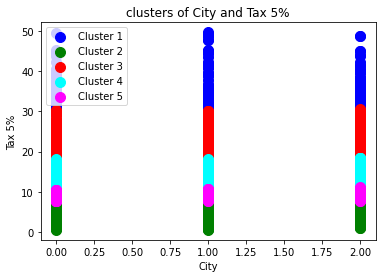

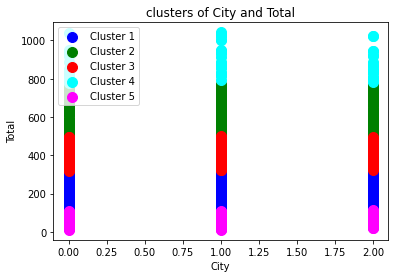

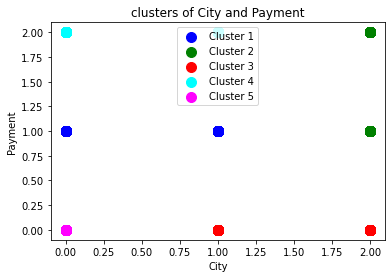

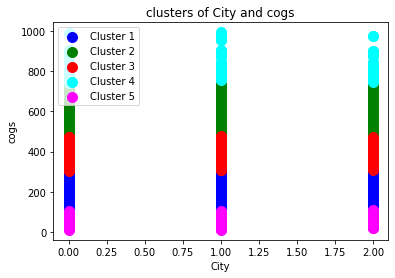

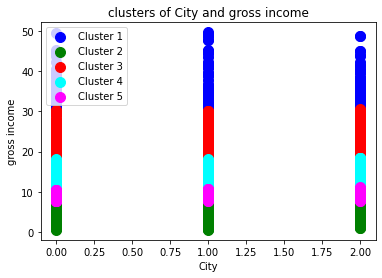

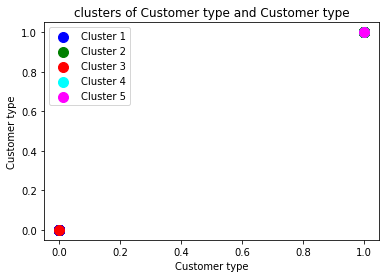

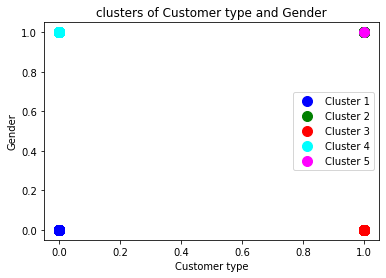

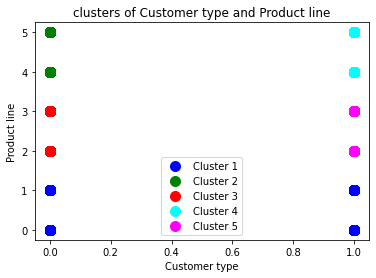

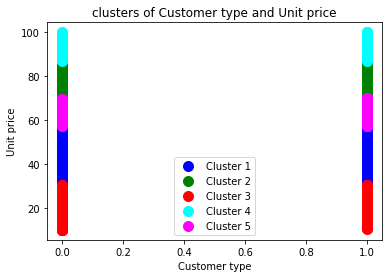

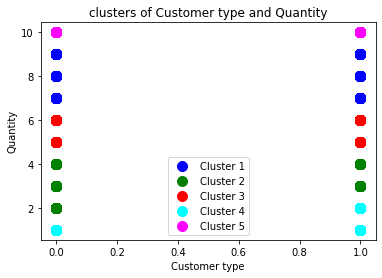

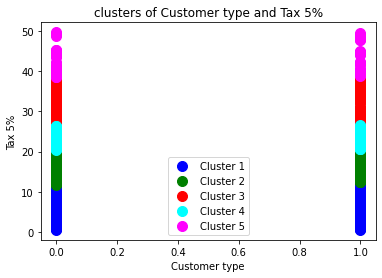

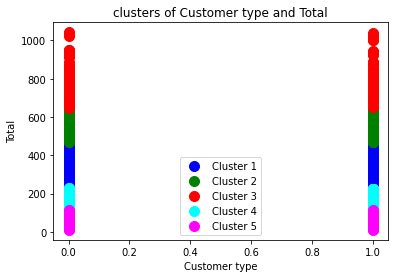

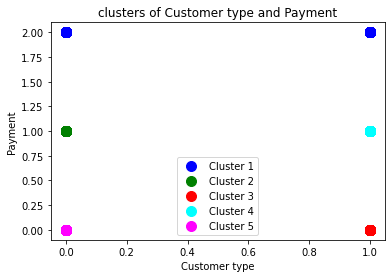

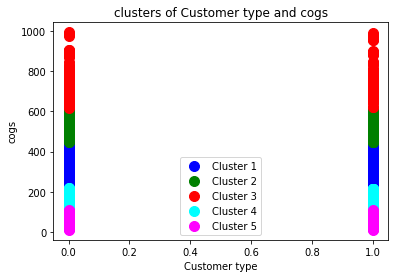

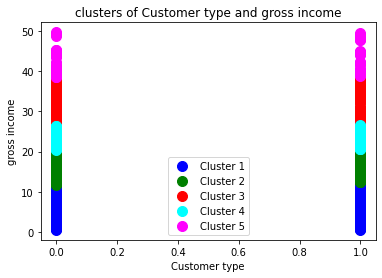

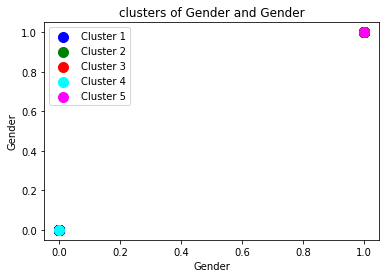

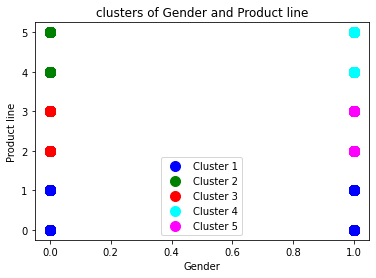

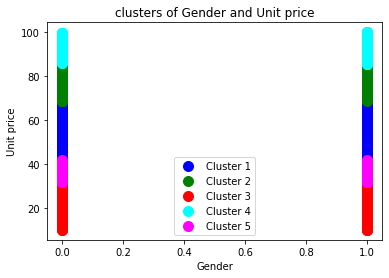

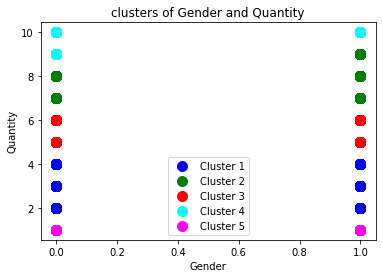

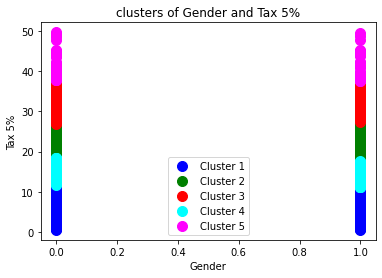

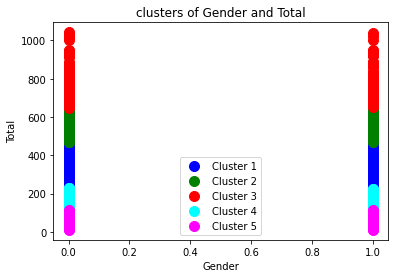

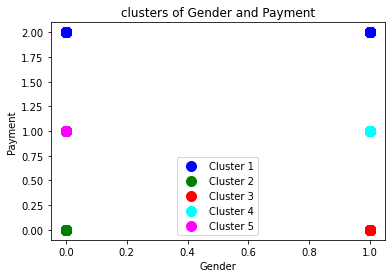

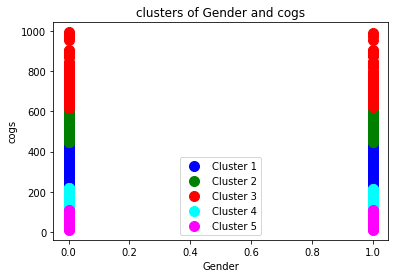

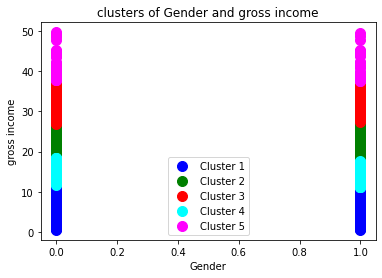

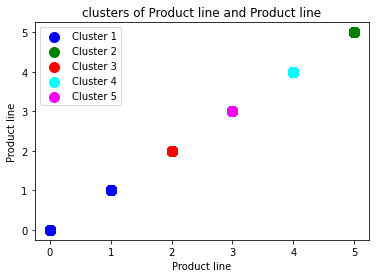

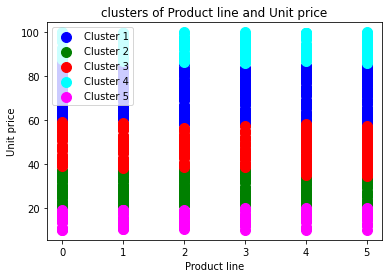

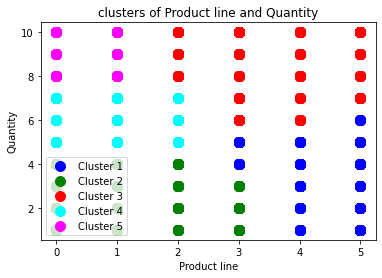

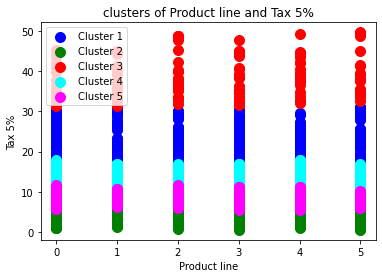

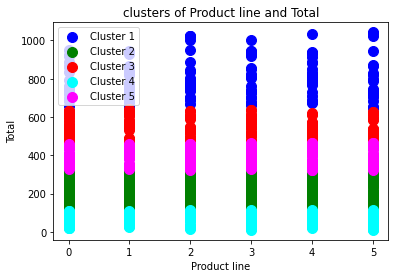

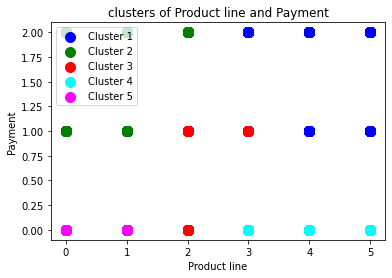

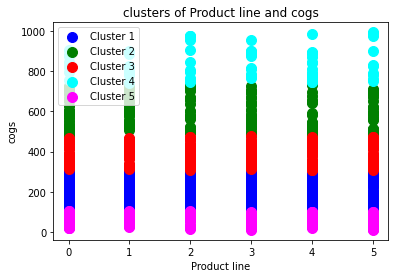

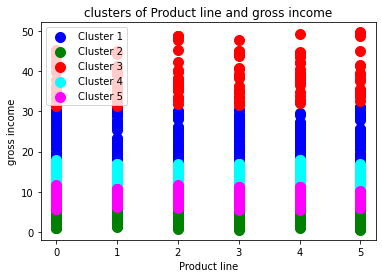

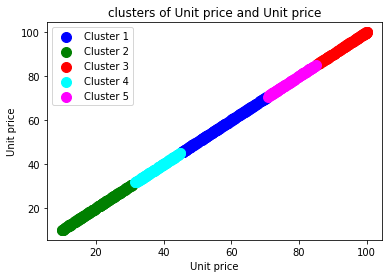

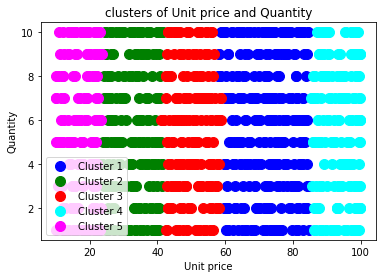

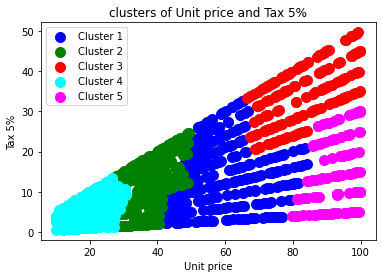

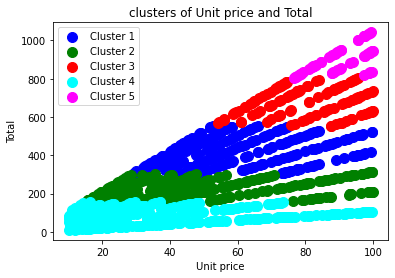

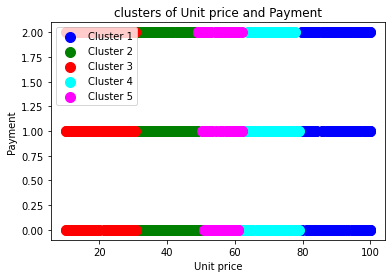

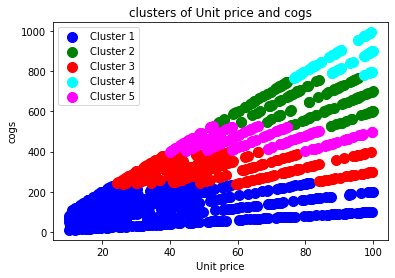

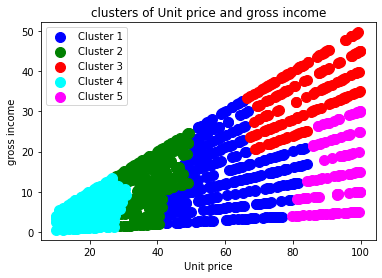

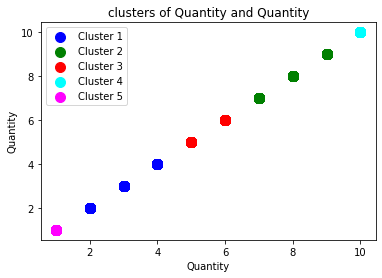

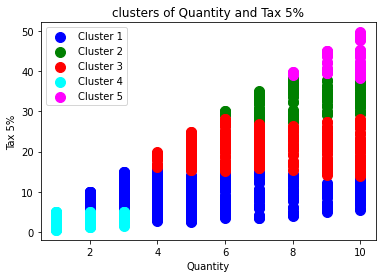

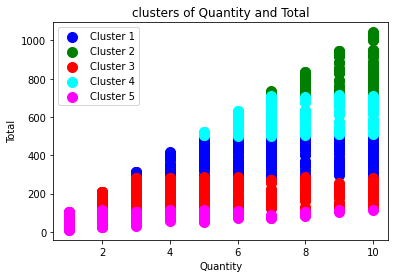

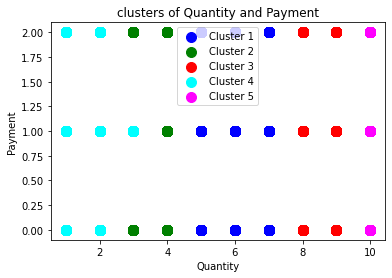

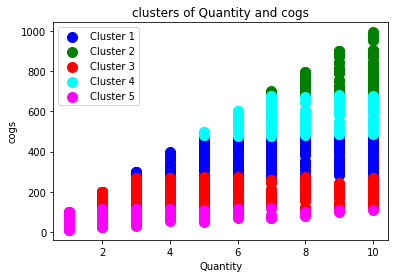

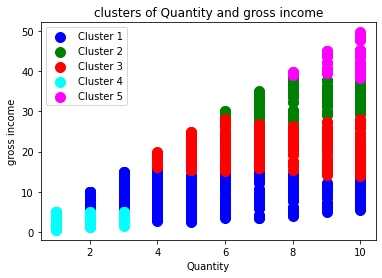

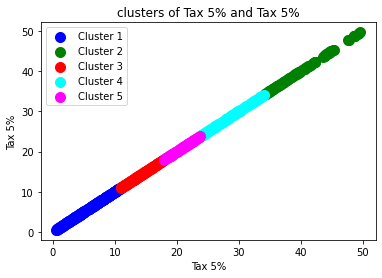

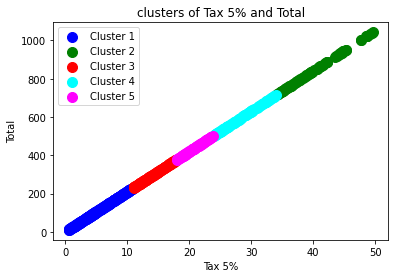

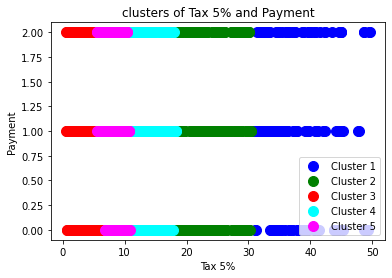

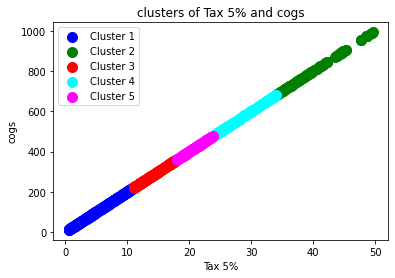

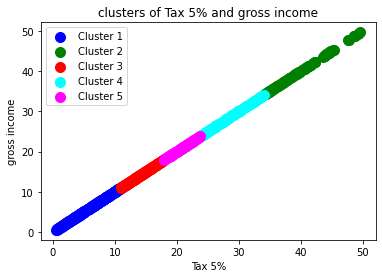

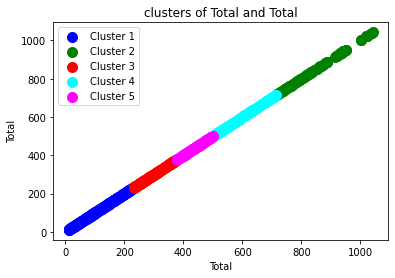

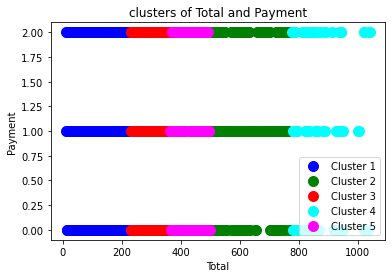

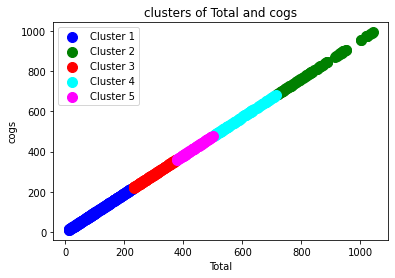

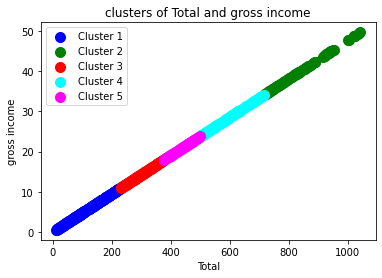

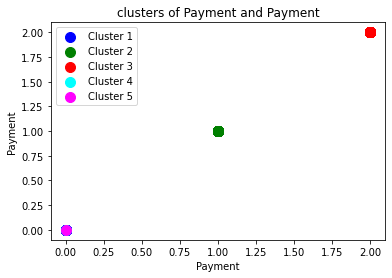

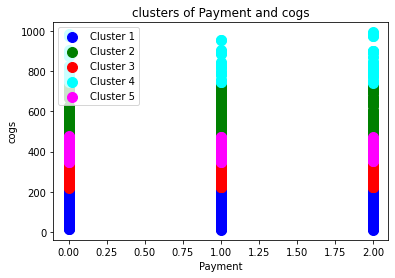

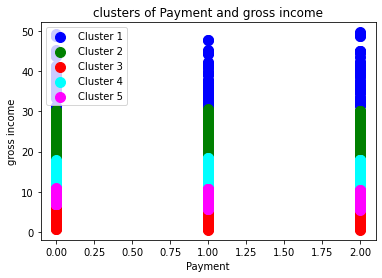

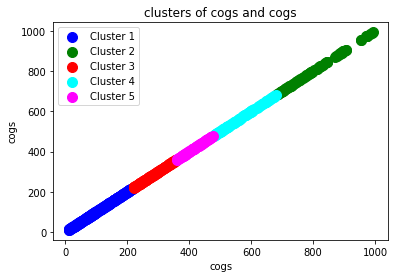

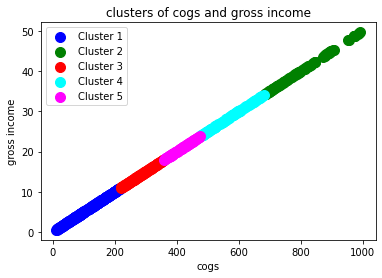

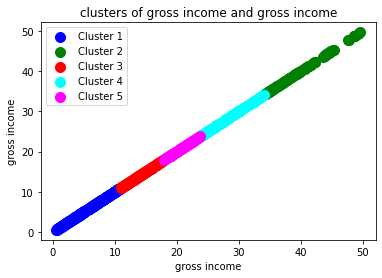

In [ ]:
for i in range(len(df.columns)-1):
  for j in range(i, len(df.columns)-1):
    clusters(i, j)
    print("\n\n")

**Advantages**

• Easy to implement

• With a large number of variables, K-­‐Means may be computaHonally faster than
hierarchical clustering (if K is small).

• k-­‐Means may produce Hghter clusters than hierarchical clustering

• An instance can change cluster (move to another cluster) when the centroids are re-­‐
computed.

Disavantages
• Difficult to predict the number of clusters (K-­‐Value)

• IniHal seeds have a strong impact on the final results

• The order of the data has an impact on the final results

• SensiHve to scale: rescaling your datasets (normalizaHon or standardizaHon) will
completely change results. While this itself is not bad, not realizing that you have to
spend extra a4en(on to scaling your data might be bad.